# Mapas auto-organizados (SOMs) 


In [9]:
### import packages:
################Pacotes#################
%matplotlib inline
import numpy as np
import pylab as py
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from IPython.display import Latex
########################################

## Leitura dos dados litologicos do Kohonen :

In [10]:
SOM = np.loadtxt('../outputs/Sintetico/C3_SOM2_convolvido.txt', skiprows = 0, unpack = True)  # Cortex de litologias

# Cabeçalho útil para fazer os graficos:

In [11]:
### -------create the tabuleiro dos neurons! ----------------###
# get number of neurons in each dimension:
nx = np.size( SOM[1] )
ny = np.size( SOM[0] )
print(nx, ny)

# create the tabuleiro based on the number of neurons in each axis:
xn = np.arange(0, nx+1 ) # numero de neuronios + 1 em x ...
yn = np.arange(0, ny+1 ) # ... e em y
Xn,Yn = np.meshgrid(yn,xn)

80 80


In [12]:
# create information for the plot:
rocks = ['Shale 2', 'Dolomite', 'Diabase', 'Conglomerate', 'Fault Zone (Co-Cr 20%)', 
         'Fault Zone (Co-Cr 40%)', 'Fault Zone (Co-Cr 60%)', 'Fault Zone (Co-Cr 80%)', 
           'Crystalline','Shale 1' ,'Halite','Granite','Sandstone']

profiles = ['RHOB', 'GR', 'SP', 'DT']

num_rocks = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0])

ticks_clean = ['','','','','','','','','','','','','']

titul = 'Self-Organizing Map (SOM)'

#Dicionário de cores de rocha (nao utilizado este dicionario)
codigo={1:['#00d34e','Shale 2'],
        2:['#82a7dd','Dolomite'],
        3:['#ff0004','Diabase'],
        4:['#ff6004','Conglomerate'],
       451:['#f4a15a','Fault Zone (Co-Cr 20%)'],
       452:['#ffddaa','Fault Zone (Co-Cr 40%)'],
       453:['#ffd9b7','Fault Zone (Co-Cr 60%)'],
       454:['#faead6','Fault Zone (Co-Cr 80%)'],
         5:['#ffbca4','Crystalline'],
       6:['#7b7b01' ,'Shale 1'],
       7:['#173c72' ,'Halite'],
       8:['#a70001' ,'Granite'],
       9:['#ffe57b' ,'Sandstone']}
       #10: ['black', 'Basalt']} nao tem basalto nos pocos de treinamento!

# corrigindo o fator de escala do código de rocha GAMBIARRA DO FELADAPUTA DO CARREIRENSE!
for i in range(0,len(SOM)):
    for j in range(0,len(SOM[i])):
        if SOM[i][j] <= 9:
            SOM[i][j] = SOM[i][j]*100

# SOM para os dados de treinamento:

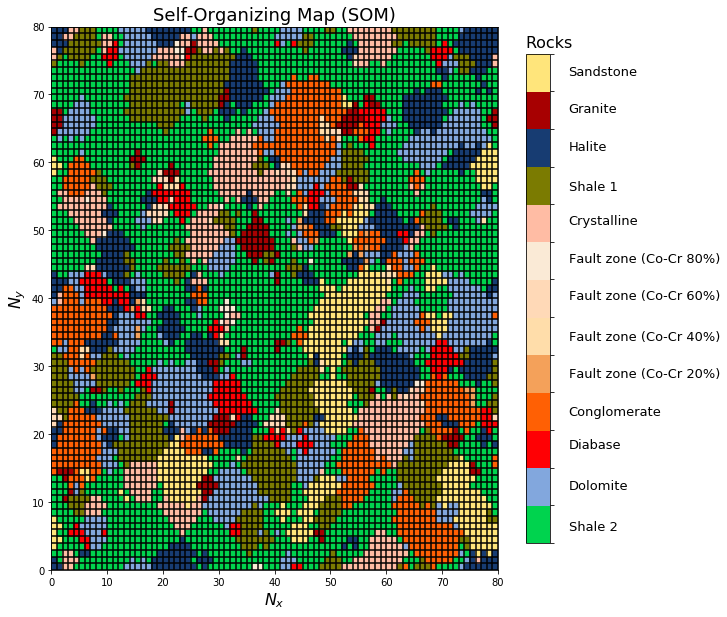

In [13]:
######## Metade do treinamento : ####################
py.rcParams['figure.figsize'] = (10.0, 10.0) # Redimensiona a figura (NAOOOO MEXER AKIIIII!!!!!!!!!!)
fig, ax = plt.subplots(nrows=1, ncols=1)
#ax1 = plt.subplot(111)

# Generate a colormap index based on discrete intervals:
cmap = colors.ListedColormap(['#00d34e', '#82a7dd','#ff0004', '#ff6004', '#f4a15a', '#ffddaa', '#ffd9b7',
                             '#faead6','#ffbca4', '#7b7b01','#173c72','#a70001','#ffe57b', '#ffe57b'], 
                             name='Rock Units', N=14)

litos = ['Shale 2', 'Dolomite', 'Diabase', 'Conglomerate', 
              'Fault zone (Co-Cr 20%)', 'Fault zone (Co-Cr 40%)', 'Fault zone (Co-Cr 60%)', 'Fault zone (Co-Cr 80%)', 
         'Crystalline', 'Shale 1', 'Halite', 'Granite', 'Sandstone']

boundaries = [100,199,299,399,450.5,451.5,452.5,453.5,499,599,699,799,899,900] # CUIDADO COM OS BOUNDARIES (bound-1) 
norm = colors.BoundaryNorm(boundaries, ncolors=14, clip=True)

# area of the plot:
extent = (0, 20, 0, 20)

# plot the tabuleiro: 
plt.plot(Xn,Yn,'-k')
plt.plot(Yn,Xn,'-k')

# plot using imshow:
im1 = ax.pcolormesh(Xn,Yn, SOM, cmap=cmap, norm=norm)

# get colorbar information:
cb1 = fig.colorbar(im1, shrink=0.90, ticks=boundaries, orientation='vertical')
ticks_clean = ['','','','','','','','','','','','','']

#title of the colorbar:
cb1.ax.set_title('Rocks', fontsize = 16 ,loc='left'  )
cb1.ax.set_yticklabels(ticks_clean)  # vertical colorbar


####################### SET the lithologies for each tick of the colorbar manually: #############################
##------------------------------------------------------------------------------------#
plt.annotate(litos[0], fontsize=13, xy=(92.5, 6), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
###------------------------------------------------------------------------------------#
plt.annotate(litos[1], fontsize=13, xy=(92.5, 12), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
####------------------------------------------------------------------------------------#
plt.annotate(litos[2], fontsize=13, xy=(92.5, 18), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
####------------------------------------------------------------------------------------#
plt.annotate(litos[3], fontsize=13, xy=(92.5, 23), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
####------------------------------------------------------------------------------------#
plt.annotate(litos[4], fontsize=13, xy=(92.5, 28.5), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
####------------------------------------------------------------------------------------#
plt.annotate(litos[5], fontsize=13, xy=(92.5, 34), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
####------------------------------------------------------------------------------------#
plt.annotate(litos[6], fontsize=13, xy=(92.5, 40), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
####------------------------------------------------------------------------------------#
plt.annotate(litos[7], fontsize=13, xy=(92.5, 45.5), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
####------------------------------------------------------------------------------------#
plt.annotate(litos[8], fontsize=13, xy=(92.5, 51), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
####------------------------------------------------------------------------------------#
plt.annotate(litos[9], fontsize=13, xy=(92.5, 56), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
####------------------------------------------------------------------------------------#
plt.annotate(litos[10], fontsize=13, xy=(92.5, 62), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
####------------------------------------------------------------------------------------#
plt.annotate(litos[11], fontsize=13, xy=(92.5, 67.5), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
####------------------------------------------------------------------------------------#
plt.annotate(litos[12], fontsize=13, xy=(92.5, 73), xycoords='data',xytext=(1, -1),
textcoords='offset points', annotation_clip=False)
##------------------------------------------------------------------------------------#

# details aobut the axis:
ax.set_ylabel('$N_y$',fontsize=16)
ax.set_xlabel('$N_x$',fontsize=16)
ax.set_title(titul,fontsize=18)
plt.savefig('../images/cortex_convolvido_nx80.png' ,dpi=600, bbox_inches='tight',transparent=True) 
plt.show()

## Cria gráfico de convergência:

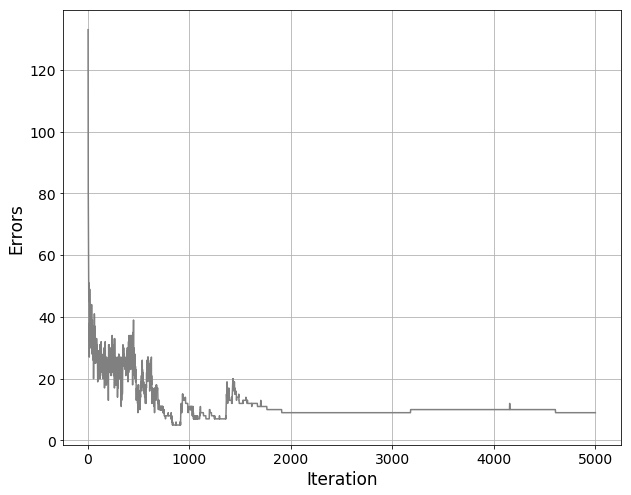

In [14]:
#Gerando o Gráfico de convergência:

convergencia=np.loadtxt('../outputs/Sintetico/C1_CONV_convolvido.txt')#dado de convergência gerado pelo koho
#print(convergencia)

x=convergencia[:,0]
y=convergencia[:,1]

py.rcParams['figure.figsize'] = (10.0, 8.0)#Redimensiona a figura

plt.plot( x, y, 'grey') # blue sem bolinha se quiser bolinha escreve 'o'
#plt.plot( x, y, 'k:', color='black') # linha pontilha black

#plt.title("Convergence", fontweight='bold', fontsize=25)
plt.tick_params(axis='both', labelsize=14)#aumenta o tamanho dos valores nos eixos

plt.grid(True)
plt.xlabel("Iteration", fontsize=17)
plt.ylabel("Errors", fontsize=17)
plt.savefig('../images/Conv_sint_convolvido_nx80.png',dpi=600, bbox_inches='tight',transparent=True)  
plt.show()  

# FIM.